---

# Data Mining Techniques

### Spring Semester 2022-2023
### Assignment 2

##### Christos Ioannou

---

Initially, we use the `import`command to import the necessary libraries. We ensure that the import has been done correctly and then mount our Google Drive so that we can load the file `books_1.Best_Books_Ever.csv`.

In [ ]:
import pandas as pd
import numpy as np
import sys
import ast
import datetime
import string
import pickle
import time

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
# Python version 3.X.X (default, MM DD YYYY, HH:MM:SS)
# Matplotlib version 3.X.X
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Pandas version 1.5.3
Matplotlib version 3.7.1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Next, we assign the path of the above-mentioned file to a variable, let's call it `Location`, which we will use to read it using the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. The result will be a dataframe.

In [ ]:
# The function r escapes all the characters in the string
Location = r'/content/gdrive/My Drive/University/Semester_8/ΤΕΔε/Εργασιες/Ασκηση_2/'

df = pd.read_csv(Location + 'books_1.Best_Books_Ever.csv')

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

Firstly, we can remove the records that contain missing data using the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [ ]:
# Use dropna() to get rid of rows that contain missing data
# Apply only in columns that we're gonna use
df.dropna(subset=['bookId', 'title', 'author', 'rating', 'description',
                  'language', 'genres', 'pages', 'publisher', 'publishDate',
                  'numRatings', 'ratingsByStars'], inplace=True)

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Preprocessing

* Creating 5 new columns: `ratingStar5`, `ratingStar4`, `ratingStar3`, `ratingStar2`, `ratingStar1` based on the `ratingsByStars` column.

In [ ]:
# Convert column to actual list instead of str
df['ratingsByStars'] = df['ratingsByStars'].apply(ast.literal_eval)

In [ ]:
# Remove records that have missing information in 'ratingsByStars' column
# -----------------------------------------------------------------------
# List of records to be removed
to_remove = []

# Iterate over the records
for index, row in df.iterrows():
  # If no ratings for every Star
  if len(row['ratingsByStars']) != 5:
    # Append record index to be_removed
    to_remove.append(index)

# Remove records that do not qualify
df.drop(to_remove, inplace=True)

In [ ]:
df['ratingStar5'] = df['ratingsByStars'].apply(lambda x: x[0])
df['ratingStar4'] = df['ratingsByStars'].apply(lambda x: x[1])
df['ratingStar3'] = df['ratingsByStars'].apply(lambda x: x[2])
df['ratingStar2'] = df['ratingsByStars'].apply(lambda x: x[3])
df['ratingStar1'] = df['ratingsByStars'].apply(lambda x: x[4])

* Creating a new column called `genreSingle` based on the `genres` column and deleting records that do not contain any information about the book genre.

In [ ]:
# Convert column to actual list instead of str
df['genres'] = df['genres'].apply(ast.literal_eval)

In [ ]:
# Remove records that have missing information in 'genres' column
# ---------------------------------------------------------------
# List of records to be removed
to_remove = []

# Iterate over the records
for index, row in df.iterrows():
  # If no info in 'genres'
  if len(row['genres']) == 0:
    # Append record index to be_removed
    to_remove.append(index)

# Remove records that do not qualify
df.drop(to_remove, inplace=True)

In [ ]:
# Create new column 'genreSingle'
df['genreSingle'] = df['genres'].apply(lambda x: x[0])

* Creating a new column named `publishYear` which contains the publication year of each book, based on the `publishDate` column.

In [ ]:
df['publishDate']

0                  09/14/08
1                  09/28/04
2                  05/23/06
3                  10/10/00
4                  09/06/06
                ...        
52473         May 28th 2011
52474       August 5th 2011
52475       March 18th 2011
52476    September 1st 2011
52477          May 8th 2011
Name: publishDate, Length: 41572, dtype: object

First of all, we need to convert the `publishDate` column to a DateTime object. However, we observe that it contains dates in different formats as well as various other inputs that do not represent dates. So, we will iterate through all the dates in the publishDate column and attempt to convert them to a datetime object using the [`to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function. If it fails, it means the conversion couldn't be made, so we'll drop that specific record from our dataframe.

In [ ]:
# List of records to be removed
to_remove = []

# Iterate over the records
for index, row in df.iterrows():
  try:
    # Try to convert to datetime
    df.at[index, 'publishDate'] = pd.to_datetime(row['publishDate'])
  except ValueError:
    # Append record index to be_removed if convert fails
    to_remove.append(index)

# Remove records that do not qualify
df.drop(to_remove, inplace=True)

df['publishDate'] = pd.to_datetime(df['publishDate'])

Now that we have all the dates as datetime objects and in the same format, we can create the new column `publishYear` as requested.

In [ ]:
df['publishYear'] = df['publishDate'].dt.year.astype(int)

## Queries for data analysis

1. Construct the histogram of ratings in the dataset (use the rating column).

Text(0.5, 0, 'Ratings')

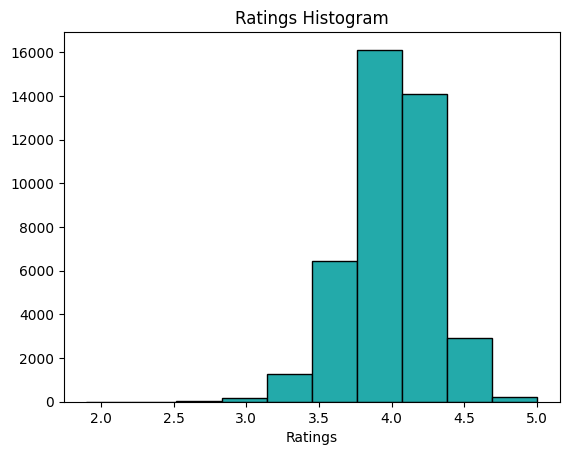

In [ ]:
plt.hist(df['rating'], color='#23AAAA', edgecolor='black')
plt.title('Ratings Histogram')
plt.xlabel('Ratings')

2. What are the top 10 books with the most pages?

In [ ]:
# Remove records that have invalid information in 'pages'
# -------------------------------------------------------
# List of records to be removed
to_remove = []

# Iterate over the records
for index, row in df.iterrows():
  # If 'pages' does not contain number
  if not row['pages'].isdigit():
    # Append record index to be_removed
    to_remove.append(index)

# Remove records that do not qualify
df.drop(to_remove, inplace=True)

# Convert from 'object' to 'int'
df['pages'] = df['pages'].astype(int)

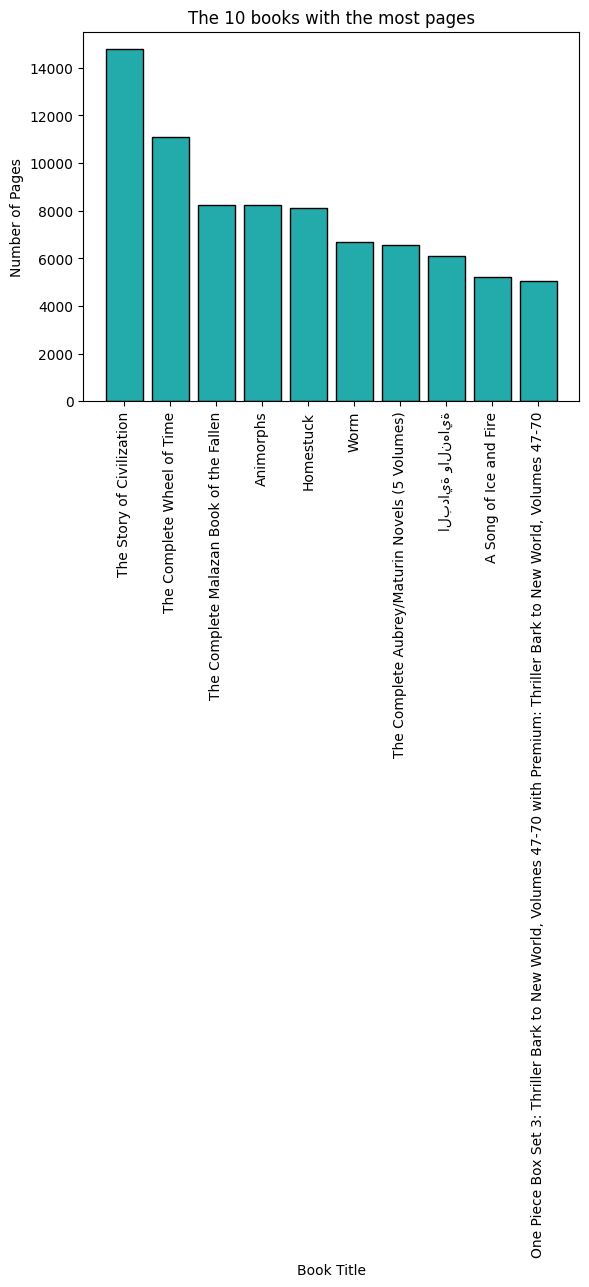

In [ ]:
# Sort in descending order of column 'pages'
# and store the first 10 rows into a new dataframe called 'most_pages'
most_pages = df.sort_values(by='pages', ascending=False).head(10)

plt.bar(range(10), most_pages['pages'], color=['#23AAAA'], edgecolor='black')
plt.title('The 10 books with the most pages')
plt.xlabel('Book Title')
plt.ylabel('Number of Pages')
plt.xticks(range(10), most_pages['title'], rotation=90)
plt.show()

5. Who are the top 10 authors with the most books?

In [ ]:
# Keep ONLY the first name in column "Author"
# Separator is either '(' OR ','
df['author'] = df['author'].str.split('\(|,').str[0]

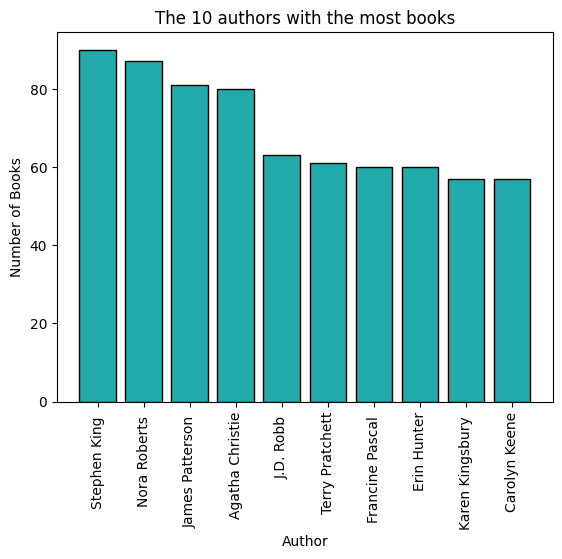

In [ ]:
# Calculate count of unique values of column 'author'
# and store the first 10 rows into 'most_books' in descending order
most_books = df['author'].value_counts(ascending=False).head(10)

plt.bar(most_books.index, most_books.values, color=['#23AAAA'], edgecolor='black')
plt.title('The 10 authors with the most books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

6. Who are the top 10 authors with the most ratings? (use the numRatings column)

In [ ]:
# Convert from 'object' to 'int'
df['numRatings'] = df['numRatings'].astype(int)

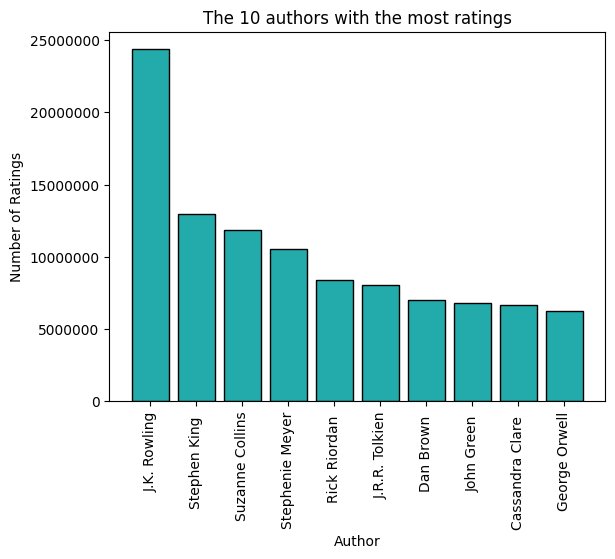

In [ ]:
# Sum all Ratings per Author
most_ratings = df.groupby('author')['numRatings'].sum()

# Sort in descending order and keep the first 10 rows
most_ratings = most_ratings.sort_values(ascending=False).head(10)

plt.bar(most_ratings.index, most_ratings.values, color=['#23AAAA'], edgecolor='black')
plt.title('The 10 authors with the most ratings')
plt.xlabel('Author')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

9. Who are the top 10 publishers who have published the most books?

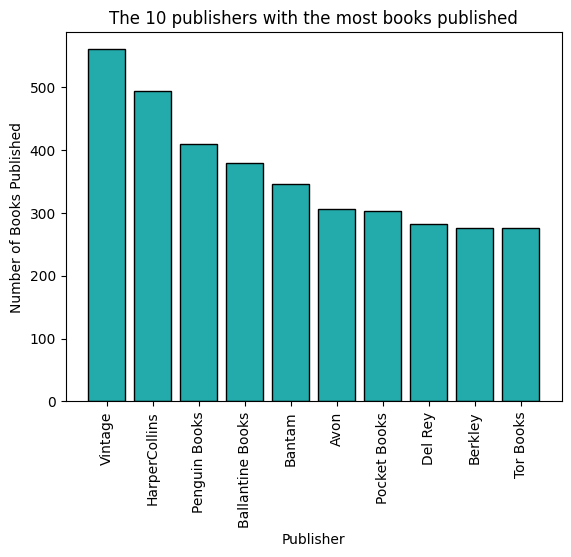

In [ ]:
# Calculate count of unique values of column 'publisher'
# and store the first 10 rows into 'most_books_publishers' in descending order
most_books_publishers = df['publisher'].value_counts(ascending=False).head(10)

plt.bar(most_books_publishers.index, most_books_publishers.values,
        color=['#23AAAA'], edgecolor='black')
plt.title('The 10 publishers with the most books published')
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=90)
plt.show()

## Implementing a Recommendation System

Initially, we observe that in the `bookId` column there are characters/text besides the book IDs. Οπότε, So, we will extract only the information that we need and will be necessary for the implementation of the Recommendation System.

In [ ]:
# Keep ONLY the bookId
# Separator is either '.' OR '-'
df['bookId'] = df['bookId'].str.split('.').str[0]
df['bookId'] = df['bookId'].str.split('-').str[0]

# Convert to int
df['bookId'] = df['bookId'].astype(int)

We are only interested in the rows where the language is "English".

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Take only the records in English
eng_df = df[df['language'] == 'English']

# Re-arrange indexes so they're continuous
eng_df.reset_index(drop=True, inplace=True)

# Limitation because we run out of RAM in Google Colab
limit = 12000

Next, we proceed with creating the `TF-IDF` matrix for the `unigrams` in the `description` column. We use the [`cosine_similarity()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function to calculate the `Cosine Similarity` metric and create a Python Dictionary containing the 100 most similar books.

Specifically, in this Python dictionary, we have the `bookId` of each book as the `key`, and as the `value`, an `ndarray` containing the 100 `indexes` needed from the `similarity_matrix`.

In [ ]:
# Create the TF-IDF matrix (unigrams)
tfidf_vectorizer_unigrams = TfidfVectorizer(min_df=2, stop_words='english', ngram_range=(1, 1))
tfidf_vectorizer_unigrams.fit(eng_df['description'])
tfidf_unigrams = tfidf_vectorizer_unigrams.transform(eng_df['description'].head(limit)) # Limitation of resources

similarity_matrix_unigrams = cosine_similarity(tfidf_unigrams, tfidf_unigrams)

unigrams_dict = {}  # Key = book_id | Value = ndarray containing 100 most similar books' indexes
for book_id, row in zip(eng_df['bookId'], similarity_matrix_unigrams):
  # Get the indexes of cosine similarity scores in descending order (highest first)
  # and from all those, keep only the first 100 (most similar)
  # Get rid of the first as it's the book itself (similarity score = 1.0)
  most_similar = np.argsort(row)[::-1][1:101]
  unigrams_dict[book_id] = most_similar

Similarly, for `bigrams`.

In [ ]:
# Create the TF-IDF matrix (bigrams)
tfidf_vectorizer_bigrams = TfidfVectorizer(min_df=2, stop_words='english', ngram_range=(2, 2))
tfidf_bigrams = tfidf_vectorizer_bigrams.fit_transform(eng_df['description'].head(limit)) # Limitation of resources

similarity_matrix_bigrams = cosine_similarity(tfidf_bigrams, tfidf_bigrams)

bigrams_dict = {} # Key = book_id | Value = ndarray containing 100 most similar books' indexes
for book_id, row in zip(eng_df['bookId'], similarity_matrix_bigrams):
  # Get the indexes of cosine similarity scores in descending order (highest first)
  # and from all those, keep only the first 100 (most similar)
  # Get rid of the first as it's the book itself (similarity score = 1.0)
  most_similar = np.argsort(row)[::-1][1:101]
  bigrams_dict[book_id] = most_similar

Next, we create the `recommend()` function which takes an id and an integer number N as input, and returns the N most similar books.


In [ ]:
def recommend(item_id, num, ngrams='unigrams'):
  main_book = eng_df.loc[eng_df['bookId'] == item_id].index[0]

  # Unigrams
  if ngrams == 'unigrams':
    unigrams_indexes = unigrams_dict[item_id][:num]
    for recommended in unigrams_indexes:
      print(f"Recommended: {eng_df.iloc[recommended]['title']}")
      print(f"Description: {eng_df.iloc[recommended]['description']}")
      print(f"(score: {similarity_matrix_unigrams[main_book][recommended]})\n")
  # Bigrams
  elif ngrams == 'bigrams':
    bigrams_indexes = bigrams_dict[item_id][:num]
    for recommended in bigrams_indexes:
      print(f"Recommended: {eng_df.iloc[recommended]['title']}")
      print(f"Description: {eng_df.iloc[recommended]['description']}")
      print(f"(score: {similarity_matrix_bigrams[main_book][recommended]})\n")
  # Error
  else:
    raise ValueError(f"Not valid parameter ngrams='{ngrams}'")

Execution example of the `Recommendation System`.

In [ ]:
item_id = 1
num = 5

if eng_df.loc[eng_df['bookId'] == item_id].empty:
  raise ValueError("No such 'bookId' exists. Try again")
elif eng_df.loc[eng_df['bookId'] == item_id].index >= limit:
  raise ValueError("No such 'bookId' exists in Similarity Matrix. Try again")

if num < 1 or num > 100:
  raise ValueError("Variable 'num' has to be between 1 and 100. Try again")

# Book's Title
title = eng_df.loc[eng_df['bookId'] == item_id, 'title'].values[0]

print(f"Recommending {num} books similar to: {title}")
print("-----------------------------------------")
recommend(item_id, num, 'unigrams')
print("-----------------------------------------\n")
recommend(item_id, num, 'bigrams')

Recommending 5 books similar to: Harry Potter and the Half-Blood Prince
-----------------------------------------
Recommended: Harry Potter and the Chamber of Secrets
Description: Ever since Harry Potter had come home for the summer, the Dursleys had been so mean and hideous that all Harry wanted was to get back to the Hogwarts School for Witchcraft and Wizardry. But just as he’s packing his bags, Harry receives a warning from a strange impish creature who says that if Harry returns to Hogwarts, disaster will strike.And strike it does. For in Harry’s second year at Hogwarts, fresh torments and horrors arise, including an outrageously stuck-up new professor and a spirit who haunts the girls’ bathroom. But then the real trouble begins – someone is turning Hogwarts students to stone. Could it be Draco Malfoy, a more poisonous rival than ever? Could it possible be Hagrid, whose mysterious past is finally told? Or could it be the one everyone at Hogwarts most suspects… Harry Potter himself!

## Implementation of Classification

* We use the `genreSingle` column to find the top 10 most frequent genres.

In [ ]:
# Get the 10 most popular genres
top10_genres = df['genreSingle'].value_counts().head(10).index

print(top10_genres)

Index(['Fiction', 'Fantasy', 'Young Adult', 'Romance', 'Nonfiction',
       'Historical Fiction', 'Mystery', 'Science Fiction', 'Classics',
       'History'],
      dtype='object')


* Next, we keep in a new dataframe, the books that belong to these top 10 most frequent genres. We will only need the columns `bookId`, `description` and `genreSingle`.

In [ ]:
# Create a copy of the previous DataFrame we had
new_df = df.copy()

# List of records to be removed
to_remove = []

# Iterate over the records
for index, row in new_df.iterrows():
  # If genre not in top10_genres
  if row['genreSingle'] not in top10_genres:
    # Append record index to be_removed
    to_remove.append(index)

# Remove records that do not qualify
new_df.drop(to_remove, inplace=True)

# Keep only 'bookId', 'description' and 'genreSingle' columns
new_df = new_df[['bookId', 'description', 'genreSingle']]

# Re-arrange indexes so they're continuous
new_df.reset_index(drop=True, inplace=True)

new_df

,bookId,description,genreSingle
0,2767052,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult
1,2,There is a door at the end of a silent corrido...,Fantasy
2,2657,The unforgettable novel of a childhood in a sl...,Classics
3,1885,Alternate cover edition of ISBN 9780679783268S...,Classics
4,41865,About three things I was absolutely positive.\...,Young Adult
...,...,...,...
25075,12464361,When seventeen-year-old Kara Nightingale is su...,Fantasy
25076,12395883,Lilah Lopez Dreser's in town to take care of u...,Romance
25077,11836711,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery
25078,10815662,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy


* Then, we clean the `description` column using the methods we have learned (e.g., removing punctuation marks, converting all characters to lowercase, etc.).

In [ ]:
for index, row in new_df.iterrows():
  # Remove punctuation
  new_df.at[index, 'description'] = row['description'].translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
  # Everything lowercase
  new_df.at[index, 'description'] = new_df.iloc[index]['description'].lower()
  # Remove newlines
  new_df.at[index, 'description'] = new_df.iloc[index]['description'].replace('\n', ' ')

new_df

,bookId,description,genreSingle
0,2767052,winning means fame and fortune losing means ce...,Young Adult
1,2,there is a door at the end of a silent corrido...,Fantasy
2,2657,the unforgettable novel of a childhood in a sl...,Classics
3,1885,alternate cover edition of isbn 9780679783268s...,Classics
4,41865,about three things i was absolutely positive ...,Young Adult
...,...,...,...
25075,12464361,when seventeen year old kara nightingale is su...,Fantasy
25076,12395883,lilah lopez dreser s in town to take care of u...,Romance
25077,11836711,anasazi sequel to the thirteenth chime by...,Mystery
25078,10815662,readers favorite awards winner 2011 sixteen...,Fantasy


* We apply the `word2vec` method to the descriptions, and then using the embeddings, we calculate for each description a vector with 200-300 values (features) - this will be the average of the embeddings of the words comprising the description.

In [ ]:
# Number of features
num_features = 300

# Whether to load or create from scratch and save to *.pkl files
# True to Load | False to Create and Save
w2v_flag = False

In [ ]:
from gensim.models import Word2Vec

if not w2v_flag:
  tokenized_descr = new_df['description'].apply(lambda x: x.split()) # tokenizing

  model_w2v = Word2Vec(tokenized_descr,
                     vector_size=num_features, # desired no. of features/independent variables
                     min_count=2,
                     sg = 1, # 1 for skip-gram model
                     workers= 4, # no.of cores
                     seed = 34)

In [ ]:
if not w2v_flag:
  # This will be our dataset
  X = []
  # These will be our labels
  Y = []

  # Iterate over each book's description
  for index, description in enumerate(tokenized_descr):
    # Counter for how many words it has
    count = 0
    # Initialize an empty ndarray with only zeros (shape: (1, num_features))
    average_embeddings = np.zeros((1, num_features))
    # Iterate over each description's words
    for word in description:
      # Check if word exists in w2v model's vocabulary
      if word in model_w2v.wv.key_to_index:
        # New word, increase counter by 1
        count += 1
        # Add word's embeddings
        average_embeddings += model_w2v.wv[word]

    # In case none of the words exist in w2v model's vocabulary
    if count > 0:
      # Divide embeddings by the number of words in total in specific description
      # We now have the average of the words' embeddings
      average_embeddings /= count

      # Append to X
      X.append(average_embeddings)

      # Get book's genreSingle
      label = new_df.iloc[index]['genreSingle']
      # Append to Y
      Y.append(label)

  # Stack arrays in sequence vertically (row wise)
  X = np.vstack(X)
  # Convert 'labels' to ndarray
  Y = np.array(Y)

* We use the Python library pickle to store the features in `*.pkl` files. This way, we don't need to recalculate the features every time we run our program, but we can load them into memory using the corresponding `load` method.

In [ ]:
if not w2v_flag:
  # Save X as 'X.pkl'
  pickle.dump(X, open(Location + 'X.pkl', 'wb'))

  # Save Y as 'Y.pkl'
  pickle.dump(Y, open(Location + 'Y.pkl', 'wb'))

In [ ]:
if w2v_flag:
  # Load X from 'X.pkl'
  X = pickle.load(open(Location + 'X.pkl', 'rb'))

  # Load Y from 'Y.pkl'
  Y = pickle.load(open(Location + 'Y.pkl', 'rb'))

* We split the dataset into train (80%) and test (20%) using the [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from the sklearn library.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

* Next, our program should be able to find the genres of the test set using the following Classification methods:
  * Naive Bayes
  * Support Vector Machines (SVM)
  * Random Forests

* All the above models will be trained **ONLY** on the train set and evaluated on the test set. Additionally, we will evaluate and record the performance of each method using 10-fold Cross Validation, utilizing the following metrics:
  * Precision / Recall / F-Measure
  * Accuracy

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.simplefilter('ignore')

scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

* We will use a DataFrame to store the results from each method.

In [ ]:
columns = ['Classification Method', 'train_test_split()',
           '10-Fold Cross Validation', 'Fit Time', 'Score Time', 'Precision',
           'Recall', 'F-Measure', 'Accuracy']

results = pd.DataFrame(columns=columns)

* Naive Bayes using the `train_test_split()` method.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Start time
start = time.time()

# Gaussian Naive Bayes (Classifier)
gnb = GaussianNB()

# Train
gnb.fit(X_train, Y_train)

# Prediction
y_pred = gnb.predict(X_test)

# Fit time
fit_time = time.time() - start

# Start time
start = time.time()

# Precision / Recall / F-Measure / Accuracy
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f_measure = f1_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Score time
score_time = time.time() - start

print("Fit Time:", fit_time)
print("Score Time:", score_time)
print("Precision:", precision)
print("Recall:", recall)
print("F-Measure:", f_measure)
print("Accuracy:", accuracy)

Fit Time: 0.24952220916748047
Score Time: 0.06036067008972168
Precision: 0.29840869542998194
Recall: 0.17411110616076625
F-Measure: 0.10391179265532398
Accuracy: 0.14114832535885166


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Gaussian Naive Bayes', True, False, fit_time,
                             score_time, precision, recall, f_measure, accuracy]

* Naive Bayes using `10-fold Cross Validation`.

In [ ]:
# Gaussian Naive Bayes (Classifier)
gnb = GaussianNB()

# 10-Fold Cross Validation using Gaussian Naive Bayes
scores = cross_validate(gnb, X, Y, cv=10, scoring=scoring)

print("Average Fit Time:", np.mean(scores['fit_time']))
print("Average Score Time:", np.mean(scores['score_time']))
print("Average Precision:", np.mean(scores['test_precision_macro']))
print("Average Recall:", np.mean(scores['test_recall_macro']))
print("Average F-Measure:", np.mean(scores['test_f1_macro']))
print("Average Accuracy:", np.mean(scores['test_accuracy']))

Average Fit Time: 0.12285523414611817
Average Score Time: 0.06157560348510742
Average Precision: 0.2630036911754257
Average Recall: 0.18765927292962042
Average F-Measure: 0.10928373422022568
Average Accuracy: 0.14655050388418014


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Gaussian Naive Bayes', False, True,
                             np.mean(scores['fit_time']),
                             np.mean(scores['score_time']),
                             np.mean(scores['test_precision_macro']),
                             np.mean(scores['test_recall_macro']),
                             np.mean(scores['test_f1_macro']),
                             np.mean(scores['test_accuracy'])]

* Support Vector Machines (SVM) using the `train_test_split()` method.

In [ ]:
from sklearn import svm

def execute_SVM(c_var, kernel_var, gamma_var):
    # Start time
    start = time.time()

    # SVM (classifier)
    clf = svm.SVC(C=c_var, kernel=kernel_var, gamma=gamma_var)

    # Train
    clf.fit(X_train, Y_train)

    # Prediction
    y_pred = clf.predict(X_test)

    # Fit time
    fit_time = time.time() - start

    # Start time
    start = time.time()

    # Precision / Recall / F-Measure / Accuracy
    precision = precision_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    f_measure = f1_score(Y_test, y_pred, average='macro')
    accuracy = accuracy_score(Y_test, y_pred)

    # Score time
    score_time = time.time() - start

    print("Fit Time:", fit_time)
    print("Score Time:", score_time)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Measure:", f_measure)
    print("Accuracy:", accuracy)

    return fit_time, score_time, precision, recall, f_measure, accuracy

In [ ]:
best_accuracy = 0

# Find the best Kernel and (hyper)parameters
for kernel_var in ['linear', 'rbf']:
    for c_var in [0.1, 0.5, 1.0]:
        for gamma_var in [0.01, 0.1, 'scale']:
            print(f"Kernel = {kernel_var} \nC = {c_var} \nGamma = {gamma_var}")
            fit_time, score_time, precision, recall, f_measure, accuracy = execute_SVM(c_var, kernel_var, gamma_var)
            print("--------------------")

            if accuracy > best_accuracy:
                best_kernel = kernel_var
                best_c = c_var
                best_gamma = gamma_var
                _fit_time = fit_time
                _score_time = score_time
                _precision = precision
                _recall = recall
                _f_measure = f_measure
                best_accuracy = accuracy

Kernel = linear 
C = 0.1 
Gamma = 0.01
Fit Time: 125.02228140830994
Score Time: 0.05603313446044922
Precision: 0.5937785315789976
Recall: 0.37493405258298657
F-Measure: 0.3843605795024234
Accuracy: 0.5239234449760766
--------------------
Kernel = linear 
C = 0.1 
Gamma = 0.1
Fit Time: 127.87218451499939
Score Time: 0.10461616516113281
Precision: 0.5937785315789976
Recall: 0.37493405258298657
F-Measure: 0.3843605795024234
Accuracy: 0.5239234449760766
--------------------
Kernel = linear 
C = 0.1 
Gamma = scale
Fit Time: 133.4487988948822
Score Time: 0.05837821960449219
Precision: 0.5937785315789976
Recall: 0.37493405258298657
F-Measure: 0.3843605795024234
Accuracy: 0.5239234449760766
--------------------
Kernel = linear 
C = 0.5 
Gamma = 0.01
Fit Time: 106.07090759277344
Score Time: 0.05727577209472656
Precision: 0.6376149426248291
Recall: 0.5112386709466039
F-Measure: 0.5388860721940347
Accuracy: 0.6018740031897927
--------------------
Kernel = linear 
C = 0.5 
Gamma = 0.1
Fit Time: 10

In [ ]:
print("--------------------------------------\nBest Kernel and (hyper)parameters are:\n--------------------------------------")
print(f"Kernel = {best_kernel} \nC = {best_c} \nGamma = {best_gamma}")
print("Fit Time:", _fit_time)
print("Score Time:", _score_time)
print("Precision:", _precision)
print("Recall:", _recall)
print("F-Measure:", _f_measure)
print("Accuracy:", best_accuracy)

--------------------------------------
Best Kernel and (hyper)parameters are:
--------------------------------------
Kernel = linear 
C = 1.0 
Gamma = 0.01
Fit Time: 88.73366189002991
Score Time: 0.10007429122924805
Precision: 0.6428676212486178
Recall: 0.5336494261514602
F-Measure: 0.5589096179908447
Accuracy: 0.615829346092504


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Support Vector Machines (SVM)', True, False,
                             _fit_time, _score_time, _precision, _recall,
                             _f_measure, best_accuracy]

* Support Vector Machines (SVM) using `10-fold Cross Validation`.

In [ ]:
# SVM (classifier)
clf = svm.SVC(C=best_c, kernel=best_kernel, gamma=best_gamma)

# 10-Fold Cross Validation using Support Vector Machines (SVM)
scores = cross_validate(clf, X, Y, cv=10, scoring=scoring)

print("Average Fit Time:", np.mean(scores['fit_time']))
print("Average Score Time:", np.mean(scores['score_time']))
print("Average Precision:", np.mean(scores['test_precision_macro']))
print("Average Recall:", np.mean(scores['test_recall_macro']))
print("Average F-Measure:", np.mean(scores['test_f1_macro']))
print("Average Accuracy:", np.mean(scores['test_accuracy']))

Average Fit Time: 88.8527160167694
Average Score Time: 10.520917892456055
Average Precision: 0.6398044489649735
Average Recall: 0.5442422183734515
Average F-Measure: 0.567415950043271
Average Accuracy: 0.625113430401256


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Support Vector Machines (SVM)', False, True,
                             np.mean(scores['fit_time']),
                             np.mean(scores['score_time']),
                             np.mean(scores['test_precision_macro']),
                             np.mean(scores['test_recall_macro']),
                             np.mean(scores['test_f1_macro']),
                             np.mean(scores['test_accuracy'])]

* Random Forests using the `train_test_split()` method.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Start time
start = time.time()

# Random Forests (Classifier)
rfc = RandomForestClassifier()

# Train
rfc.fit(X_train, Y_train)

# Prediction
y_pred = rfc.predict(X_test)

# Fit time
fit_time = time.time() - start

# Start time
start = time.time()

# Precision / Recall / F-Measure / Accuracy
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f_measure = f1_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Score time
score_time = time.time() - start

print("Fit Time:", fit_time)
print("Score Time:", score_time)
print("Precision:", precision)
print("Recall:", recall)
print("F-Measure:", f_measure)
print("Accuracy:", accuracy)

Fit Time: 47.981048583984375
Score Time: 0.05563616752624512
Precision: 0.6278344922786736
Recall: 0.4722980913110465
F-Measure: 0.5034790044309718
Accuracy: 0.569377990430622


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Random Forests', True, False, fit_time,
                             score_time, precision, recall, f_measure, accuracy]

* Random Forests using `10-fold Cross Validation`.

In [ ]:
# Random Forests (Classifier)
rfc = RandomForestClassifier()

# 10-Fold Cross Validation using Random Forests
scores = cross_validate(rfc, X, Y, cv=10, scoring=scoring)

print("Average Fit Time:", np.mean(scores['fit_time']))
print("Average Score Time:", np.mean(scores['score_time']))
print("Average Precision:", np.mean(scores['test_precision_macro']))
print("Average Recall:", np.mean(scores['test_recall_macro']))
print("Average F-Measure:", np.mean(scores['test_f1_macro']))
print("Average Accuracy:", np.mean(scores['test_accuracy']))

Average Fit Time: 57.568510103225705
Average Score Time: 0.14299776554107665
Average Precision: 0.6246386774438236
Average Recall: 0.4736816244572576
Average F-Measure: 0.5048723968837264
Average Accuracy: 0.5712396676864586


In [ ]:
# Add to 'results' DataFrame
results.loc[len(results)] = ['Random Forests', False, True,
                             np.mean(scores['fit_time']),
                             np.mean(scores['score_time']),
                             np.mean(scores['test_precision_macro']),
                             np.mean(scores['test_recall_macro']),
                             np.mean(scores['test_f1_macro']),
                             np.mean(scores['test_accuracy'])]

---
**Results Table:**

*The times displayed are in seconds.*

*In entries where 10-Fold Cross Validation = True, the time indicated is the average of each k-fold.*

In [ ]:
results

,Classification Method,train_test_split(),10-Fold Cross Validation,Fit Time,Score Time,Precision,Recall,F-Measure,Accuracy
0,Gaussian Naive Bayes,True,False,0.249522,0.060361,0.298409,0.174111,0.103912,0.141148
1,Gaussian Naive Bayes,False,True,0.122855,0.061576,0.263004,0.187659,0.109284,0.146551
2,Support Vector Machines (SVM),True,False,88.733662,0.100074,0.642868,0.533649,0.558910,0.615829
3,Support Vector Machines (SVM),False,True,88.852716,10.520918,0.639804,0.544242,0.567416,0.625113
4,Random Forests,True,False,47.981049,0.055636,0.627834,0.472298,0.503479,0.569378
5,Random Forests,False,True,57.568510,0.142998,0.624639,0.473682,0.504872,0.571240


> Christos Ioannou